# Machine Learning  -  CAC 2

# State Bank of India **(SBI BANK)** datasets (14th may 2020 - 14th may 2024)

### Submitted by :
### Name : **Manish Kumar**
### Register number : **23122022**
### Class : **3MScDS A**

# Datasets Description

### **Context** : 

The data is the price history and trading volumes of SBI (State Bank of India) datsets from NSE (National Stock Exchange) India. The data in the dataset spans from 14th May, 2020 to 14th May, 2024.

Dataset link : https://finance.yahoo.com/quote/SBIN.NS/history/?period1=1652486400&period2=1715707972

### **Columns Description :**


**Date -** Trade Data: Represents the date of the trading data, indicating when the stock market activity occurred.

**Open -** Opening Price for the Day: Represents the initial price at which a stock is traded on a given day.

**High -** Highest Price for the Day: Denotes the highest trading price reached by the stock during the trading day.

**Low -** Lowest Price for the Day: Represents the lowest trading price reached by the stock during the trading day.

**Close -** Closing Price: Indicates the final trading price of the stock at the end of the trading day.

**Adj Close -** The adjusted closing price takes dividends, stock splits, and new stock offerings into account. The adjusted closing price is a more accurate indicator of stock value since it starts where the closing price finishes.

**Volume -** Volume Traded for the Day: Represents the total number of shares or contracts traded during a specific time period, typically a trading day.

## Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Datasets

In [2]:
# Importing datasets

df = pd.read_csv("SBIN.NS.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-14,170.949997,171.750000,167.500000,167.949997,160.732971,48136531
1,2020-05-15,167.949997,168.250000,164.699997,166.399994,159.249573,35495540
2,2020-05-18,166.399994,166.399994,155.000000,155.300003,148.626572,77349435
3,2020-05-19,157.500000,157.850006,152.399994,152.800003,146.233994,71522334
4,2020-05-20,153.000000,155.250000,151.149994,153.399994,146.808197,66168767
...,...,...,...,...,...,...,...
987,2024-05-08,802.599976,822.000000,799.500000,810.799988,810.799988,27908322
988,2024-05-09,811.900024,839.650024,803.549988,819.799988,819.799988,49290254
989,2024-05-10,827.000000,832.049988,815.599976,817.349976,817.349976,20543142
990,2024-05-13,819.849976,819.849976,798.599976,808.799988,808.799988,15398505


# Data Reading and Cleaning

In [3]:
# Printing top 10 rows
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-14,170.949997,171.750000,167.500000,167.949997,160.732971,48136531
1,2020-05-15,167.949997,168.250000,164.699997,166.399994,159.249573,35495540
2,2020-05-18,166.399994,166.399994,155.000000,155.300003,148.626572,77349435
3,2020-05-19,157.500000,157.850006,152.399994,152.800003,146.233994,71522334
4,2020-05-20,153.000000,155.250000,151.149994,153.399994,146.808197,66168767
5,2020-05-21,153.649994,156.149994,151.500000,151.949997,145.420517,61147471
6,2020-05-22,152.000000,155.600006,149.449997,150.850006,144.367783,87064198
7,2020-05-26,152.399994,153.199997,150.199997,151.399994,144.894135,48275988
8,2020-05-27,151.949997,160.800003,150.800003,158.600006,151.784760,88195120
9,2020-05-28,159.449997,162.399994,156.699997,158.199997,151.401932,76968678


In [4]:
# Printing bottom 10 rows
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
982,2024-04-30,826.500000,834.849976,819.900024,826.250000,826.250000,27449073
983,2024-05-02,826.900024,833.900024,825.000000,830.049988,830.049988,19943724
984,2024-05-03,834.799988,836.200012,820.000000,831.450012,831.450012,22667634
985,2024-05-06,835.000000,836.000000,803.000000,807.799988,807.799988,35283557
986,2024-05-07,812.000000,814.650024,793.200012,801.900024,801.900024,16725013
987,2024-05-08,802.599976,822.000000,799.500000,810.799988,810.799988,27908322
988,2024-05-09,811.900024,839.650024,803.549988,819.799988,819.799988,49290254
989,2024-05-10,827.000000,832.049988,815.599976,817.349976,817.349976,20543142
990,2024-05-13,819.849976,819.849976,798.599976,808.799988,808.799988,15398505
991,2024-05-14,813.000000,822.400024,807.900024,818.200012,818.200012,10912462


In [5]:
# Display the size of the dataset
df.shape

(992, 7)

In [6]:
df.columns # Column names

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# Statical summary of the datsets
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,992.000000,992.000000,992.000000,992.000000,992.000000,9.920000e+02
mean,475.042793,480.368398,469.298790,474.845010,465.262039,2.862931e+07
std,154.472636,155.449396,153.384434,154.451555,156.922808,2.514095e+07
min,151.949997,153.199997,149.449997,150.850006,144.367783,3.692065e+06
25%,398.525009,408.762497,394.937500,400.787506,383.565147,1.289463e+07
50%,506.250000,512.750000,499.125000,506.524994,489.379364,1.871805e+07
75%,577.750000,581.587494,572.662476,576.900024,573.387497,3.692489e+07
max,835.000000,839.650024,825.000000,831.450012,831.450012,2.149557e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       992 non-null    object 
 1   Open       992 non-null    float64
 2   High       992 non-null    float64
 3   Low        992 non-null    float64
 4   Close      992 non-null    float64
 5   Adj Close  992 non-null    float64
 6   Volume     992 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.4+ KB


## Checking for Missing values

In [9]:
# Checking for the missing values
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Since, There are no missing values

## Histogram

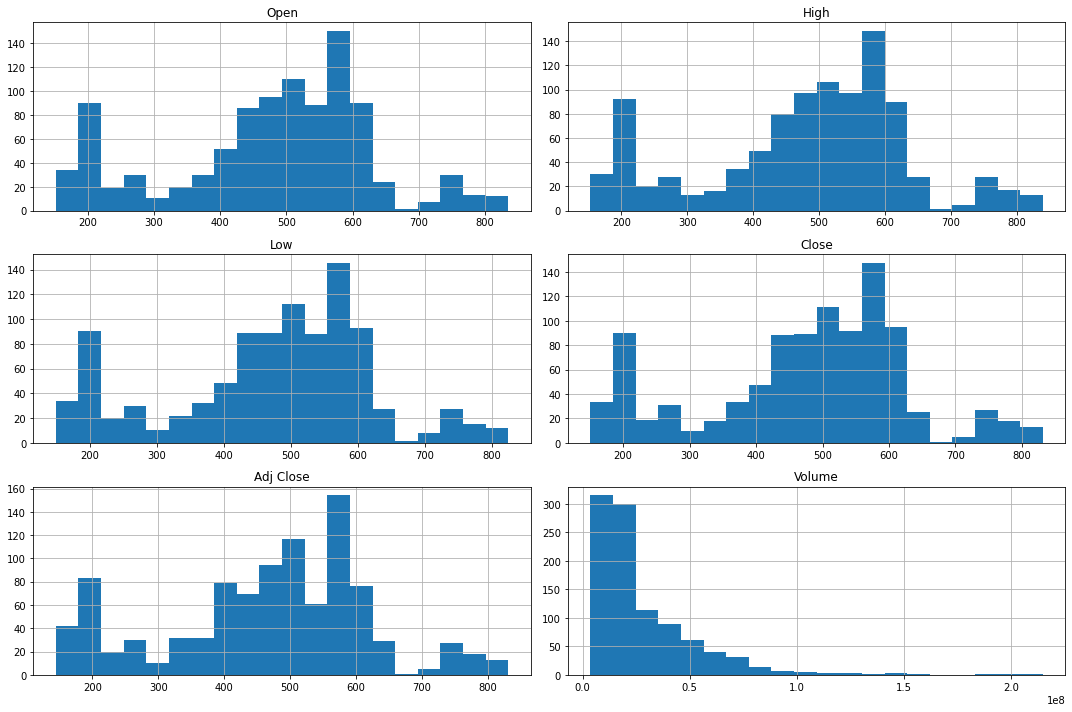

In [10]:
df.hist(bins=20, figsize=(15,10))  # Here we create histograms for each column in the DataFrame 'df'.

plt.tight_layout() # Here we Adjust the layout to prevent overlap.

plt.show() # It is used to show the histograms.

### Creating New Dataframe df1

In [12]:
# A new DataFrame "df1" is created by selecting only the "Adj Close" column from the original DataFrame "df"

df1 = df[['Adj Close']]

In [13]:
#Create one more column Prediction shifted 10 days up. 

df1['Prediction'] = df1[['Adj Close']].shift(-10)

C:\Users\Manish\AppData\Local\Temp\ipykernel_14132\1258609162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Prediction'] = df1[['Adj Close']].shift(-10)


In [14]:
#printing top 20 data set
df1.head(10)

,Adj Close,Prediction
0,160.732971,154.368729
1,159.249573,162.742737
2,148.626572,162.934128
3,146.233994,167.384323
4,146.808197,166.570847
5,145.420517,179.729996
6,144.367783,178.772964
7,144.894135,176.523926
8,151.784760,179.634277
9,151.401932,169.537643


In [15]:
#printing bottom 20 data set
df1.tail(10)

,Adj Close,Prediction
982,826.250000,NaN
983,830.049988,NaN
984,831.450012,NaN
985,807.799988,NaN
986,801.900024,NaN
987,810.799988,NaN
988,819.799988,NaN
989,817.349976,NaN
990,808.799988,NaN
991,818.200012,NaN


In [16]:
#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(df1.drop(['Prediction'], axis = 1))

#Remove the last 15 rows
X = X[:-10]
print(X)

[[160.732971]
 [159.249573]
 [148.626572]
 [146.233994]
 [146.808197]
 [145.420517]
 [144.367783]
 [144.894135]
 [151.78476 ]
 [151.401932]
 [154.368729]
 [162.742737]
 [162.934128]
 [167.384323]
 [166.570847]
 [179.729996]
 [178.772964]
 [176.523926]
 [179.634277]
 [169.537643]
 [171.451691]
 [166.235886]
 [165.470276]
 [165.518112]
 [171.930206]
 [176.571808]
 [179.634277]
 [184.180176]
 [176.667511]
 [177.289566]
 [176.667511]
 [171.547394]
 [170.781754]
 [176.858917]
 [177.480972]
 [176.763199]
 [179.969254]
 [180.495621]
 [183.653809]
 [190.544418]
 [187.194824]
 [184.419418]
 [178.055191]
 [175.901886]
 [178.246613]
 [180.112808]
 [182.553223]
 [186.046371]
 [183.749512]
 [189.730942]
 [183.701645]
 [179.107925]
 [181.309082]
 [182.983902]
 [178.533707]
 [183.223145]
 [183.98877 ]
 [183.366714]
 [183.223145]
 [182.744614]
 [182.45752 ]
 [185.472168]
 [186.668457]
 [194.563934]
 [193.224075]
 [188.056137]
 [184.802246]
 [186.716309]
 [188.582504]
 [186.381348]
 [189.874496]
 [192.

In [17]:
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df1['Prediction'])
# Remove Last 10 rows
y = y[:-10]
print(y)

[154.368729 162.742737 162.934128 167.384323 166.570847 179.729996
 178.772964 176.523926 179.634277 169.537643 171.451691 166.235886
 165.470276 165.518112 171.930206 176.571808 179.634277 184.180176
 176.667511 177.289566 176.667511 171.547394 170.781754 176.858917
 177.480972 176.763199 179.969254 180.495621 183.653809 190.544418
 187.194824 184.419418 178.055191 175.901886 178.246613 180.112808
 182.553223 186.046371 183.749512 189.730942 183.701645 179.107925
 181.309082 182.983902 178.533707 183.223145 183.98877  183.366714
 183.223145 182.744614 182.45752  185.472168 186.668457 194.563934
 193.224075 188.056137 184.802246 186.716309 188.582504 186.381348
 189.874496 192.793427 199.01413  200.832474 206.38324  215.187927
 202.890076 208.727966 206.957443 203.990662 197.722137 198.966263
 195.281708 186.477051 189.635239 193.989716 189.9702   191.549286
 189.68309  187.05127  184.32373  177.815948 178.198746 175.901886
 168.772018 174.370636 179.203629 177.09816  177.433136 182.12

## Data Splitting

In [18]:
# Split the data into train and test with 80 & 20 % respectively

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVR Model with kernel RBF

## Model Fitting

In [19]:
# SVM Model
svr = SVR(kernel='rbf', C=2e3, gamma=0.0001)
# Train the model 
svr.fit(x_train, y_train)

SVR(C=2000.0, gamma=0.0001)

### Accuracy of the model

In [20]:
# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9728784586302134


**Accuracy of the Model is 97%**

In [21]:
forecast = np.array(df1.drop(['Prediction'],axis=1))[-10:]
print(forecast)

[[826.25    ]
 [830.049988]
 [831.450012]
 [807.799988]
 [801.900024]
 [810.799988]
 [819.799988]
 [817.349976]
 [808.799988]
 [818.200012]]


## Prediction

In [22]:
# support vector model predictions for the next ‘10’ days
svm_prediction = svr.predict(forecast)
print(svm_prediction)

[818.24472861 818.75514468 818.75865232 807.43327298 802.07920389
 809.91426707 815.85165385 814.4998697  808.28217544 814.99388169]


### Actual and predicted values

In [23]:
dataframe = pd.DataFrame({'Actual':forecast.flatten(),'predicted':svm_prediction.flatten()})
dataframe.tail(20)

,Actual,predicted
0,826.250000,818.244729
1,830.049988,818.755145
2,831.450012,818.758652
3,807.799988,807.433273
4,801.900024,802.079204
5,810.799988,809.914267
6,819.799988,815.851654
7,817.349976,814.499870
8,808.799988,808.282175
9,818.200012,814.993882


### MAE, MSE, RMSE, R-square

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
# Printout relevant metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(forecast, svm_prediction))
print("Mean squared Error:",metrics.mean_squared_error(forecast, svm_prediction))
print("root mean squared Error:",np.sqrt(metrics.mean_squared_error(forecast, svm_prediction)))
print("R Square Score is :",r2_score(forecast, svm_prediction))

Mean Absolute Error: 4.394547355344139
Mean squared Error: 38.79394028954883
root mean squared Error: 6.228478168023777
R Square Score is : 0.5650044474278766


 **SVR Model**
   - **MAE** = **4.39**
   - **MSE** = **38.79**
   - **RMSE** = **6.22**
   - **R-square score** = **0.56**

Root Mean Square Error (RMSE) measures the average deviation of the predicted values from the actual values. R² Score (coefficient of determination) measures the proportion of the variance in the dependent variable (median house value) that is predictable from the independent variables. R² score ranges from 0 to 1, with higher values indicating better fit.

**Best Configuration = Lower RMSE and higher R-square score**

## Evaluation Metrics

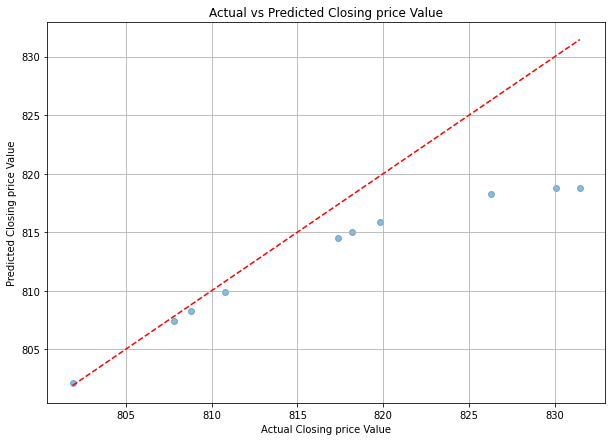

In [25]:
# Plotting the predicted line and scatter plot of y_test values
plt.figure(figsize=(10, 7))
plt.scatter(forecast, svm_prediction, alpha=0.5)
plt.plot([min(forecast), max(forecast)], [min(forecast), max(forecast)], color='red', linestyle='--')
plt.xlabel('Actual Closing price Value')
plt.ylabel('Predicted Closing price Value')
plt.title('Actual vs Predicted Closing price Value')
plt.grid(True)
plt.show()

## Plotting the Actual and Predicted Prices for SBI Stocks

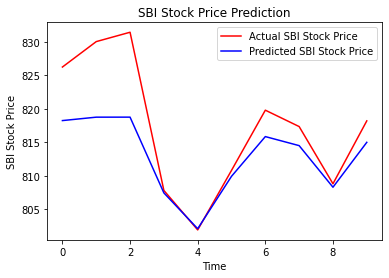

In [26]:
plt.plot(forecast, color = 'red', label = 'Actual SBI Stock Price')
plt.plot(svm_prediction, color = 'blue', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBI Stock Price')
plt.legend()

## Interpretation

**With an RMSE of 6.22 and an R² of 0.56 using SVR with the RBF kernel, the model's predictive accuracy is relatively moderate.**